# Crop Yield Production Recommendation System :

In [1]:
#

### Importing all important liberaries : 

In [2]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')


### Data Loading : 

In [3]:

path = '../Data/Crop_recommendation.csv'
data = pd.read_csv(path)


In [4]:
data.head(7)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,76,44,17,20.416831,62.554248,5.855442,65.277985,maize
4,67,60,25,24.921622,66.786274,5.750255,109.216228,maize
5,70,44,19,23.316891,73.454154,5.852607,94.297128,maize
6,103,40,30,27.309018,55.196224,6.348316,141.483164,coffee




In our dataset:
    
    N (Nitrogen)    = ratio of Nitrogen content in soil
    P (Phosphorous) = ratio of Phosphorous content in soil
    K (Potassium)   = ratio of Potassium content in soil
    Temperature     = temperature in degree Celsius
    Humidity        = relative humidity in %
    ph Value        = ph value of the soil
    Rainfall        = rainfall in mm
    

In [5]:
#--

## Data Cleaning -

In [6]:
# check is their any null value -

data.isnull().sum()

N               0
P               0
K               0
temperature     0
humidity        0
ph             27
rainfall       29
label           0
dtype: int64

We have some null values in ph and rainfall

<AxesSubplot:>

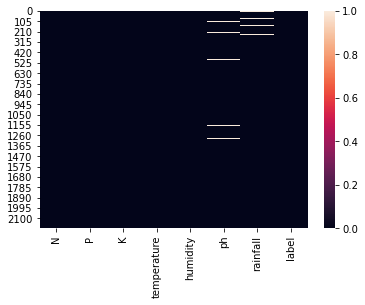

In [7]:
#The visual representation of null values using seaborn.
sns.heatmap(data.isnull())

In [8]:
# Now we will fill na values with median - 

data.ph = data.ph.fillna(data.ph.median())

data.rainfall = data.rainfall.fillna(data.rainfall.median())


In [9]:
# now again we will check is their any null values left -

data.isnull().sum()


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [10]:
#
data.label.unique()

array(['rice', 'maize', 'coffee', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'water melon', 'watermelon',
       'muskmelon', 'musk melon', 'apple', 'Apple', 'orange', 'Orange',
       'papaya', 'coconut', 'coConut', 'Coconut', 'cotton', 'jute'],
      dtype=object)

As we can see in label column most of the data are wrong spell like :

    watermelon = water melon
    muskmelon = musk melon
    apple = Apple
    orange = Orange
    coconut = coConut
    
at some place it has space between words and at some place some capital letter words.

In [11]:

# Function for lowering the cases and  removing unwanted spaces -

def change_case(i):
    i = i.replace(" ", "")
    i = i.lower()
    return i


In [12]:
data['label'] = data['label'].apply(change_case)

In [13]:
data['label'].unique()


array(['rice', 'maize', 'coffee', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute'], dtype=object)


Now we can see our data looks good

In [14]:
#
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,76,44,17,20.416831,62.554248,5.855442,65.277985,maize
4,67,60,25,24.921622,66.786274,5.750255,109.216228,maize


## Exploratory Data Analysis -

In [15]:
# shape of the data - 

data.shape

(2200, 8)

In [16]:
# unique data of crops -

data['label'].unique()

array(['rice', 'maize', 'coffee', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute'], dtype=object)

In [17]:
# data types of each column -

data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [18]:
#Checking the Statistics for all the crops

print("Average Ratio of Nitrogen in the soil :{0: .2f}".format(data["N"].mean()))
print("Average Ratio of Phosphorous in the soil :{0: .2f}".format(data["P"].mean()))
print("Average Ratio of Potassium in the soil :{0: .2f}".format(data["K"].mean()))
print("Average temperature in Celsius :{0: .2f}".format(data['temperature'].mean()))
print("Average Relative Humidity in % is :{0: .2f}".format(data['humidity'].mean()))
print("Average pH value of the soil :{0: .2f}".format(data['ph'].mean()))
print("Average Rain fall in mm :{0: .2f}".format(data['rainfall'].mean()))


Average Ratio of Nitrogen in the soil : 50.55
Average Ratio of Phosphorous in the soil : 53.37
Average Ratio of Potassium in the soil : 48.11
Average temperature in Celsius : 25.62
Average Relative Humidity in % is : 71.44
Average pH value of the soil : 6.47
Average Rain fall in mm : 102.48


 Our above analysis shows that : 
    
     Nitrogen, Phosphorous and Potassium should be around 50% presense in the soil
     Temperature should be 25 degree celsius and Humidity around 70%
     pH value should be around 6 and Rainfall around 102 mm
    

In [19]:

#For interactivity
# it is a HTML widgets for jupyter notebook 

from ipywidgets import interact

@interact

def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label'] == crops]
    
    print("--------- ------- ------ -------- ------- ------")
    print("Statistics for Nitrogen :")
    print("Minimum Nitrogen Required :", x['N'].min())
    print("Average Nitrogen Required :", x['N'].mean())
    print("Maximum Nitrogen Required :", x['N'].max())
    print("-------- ---------- ---------------- ------ -------")
    print("Statistics for Phosphorous :")
    print("Minimum Phosphorous Required :", x['P'].min())
    print("Average Phosphorous Required :", x['P'].mean())
    print("Maximum Phosphorous Required :", x['P'].max())
    print("------ ------------ -------- ------------ ---------")
    print("Statistics for Potassium :")
    print("Minimum Potassium Required :", x['K'].min())
    print("Average Potassium Required :", x['K'].mean())
    print("Maximum Potassium Required :", x['K'].max())
    print("---- ------------- ---------------- --------------")
    print("Statistics for Temperature :")
    print("Minimum Temperature Required : {0: .2f}".format(x['temperature'].min()))
    print("Average Temperature Required : {0: .2f}".format(x['temperature'].mean()))
    print("Maximum Temperature Required : {0: .2f}".format(x['temperature'].max()))
    print("------ ---------- ------------- ------------- -----")
    print("Statistics for Humidity :")
    print("Minimum Humidity Required : {0: .2f}".format(x['humidity'].min()))
    print("Average Humidity Required : {0: .2f}".format(x['humidity'].mean()))
    print("Maximum Humidity Required : {0: .2f}".format(x['humidity'].max()))
    print("--------- --------------- ---------- --------- ---")
    print("Statistics for pH Value :")
    print("Minimum PH Required : {0: .2f}".format(x['ph'].min()))
    print("Average PH Required : {0: .2f}".format(x['ph'].mean()))
    print("Maximum PH Required : {0: .2f}".format(x['ph'].max()))
    print("--- --------- ---------- ------ ------------- ----")
    print("Statistics for Rainfall :")
    print("Minimum Rainfall Required : {0: .2f}".format(x['rainfall'].min()))
    print("Average Rainfall Required : {0: .2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall Required : {0: .2f}".format(x['rainfall'].max()))
    print("-------------------------------------------------")
    
    
#  Select any crop from below dropdown -

interactive(children=(Dropdown(description='crops', options=('maize', 'coffee', 'mungbean', 'mango', 'muskmelo…

In [20]:

# Now with this dataset, we will find the best suitable Crop for Summer Season, Winter Season and Rainy Season :

print("Summer Crops")
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print("---------------------------------------------------------------")

print("Winter Crops")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print("---------------------------------------------------------------")

print("Rainy Crops")
print(data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique())


Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
---------------------------------------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
---------------------------------------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


## Data Visualization -

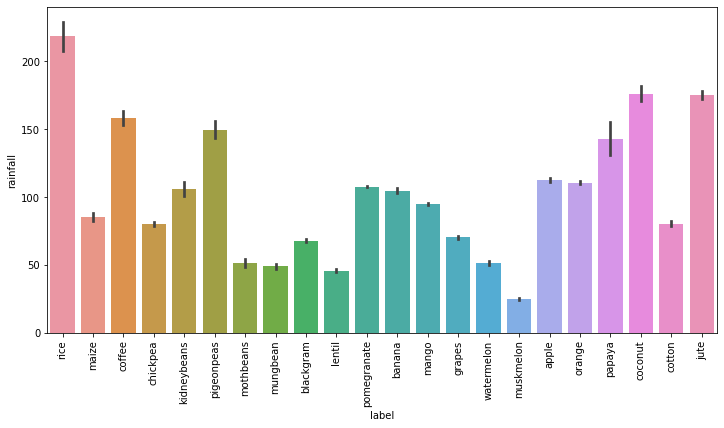

In [21]:

# plotting bar plot using label and rainfall --

plt.figure(figsize = (12,6))
sns.barplot("label", "rainfall", data = data)
plt.xticks(rotation = 90)
plt.show()


<AxesSubplot:xlabel='rainfall', ylabel='Density'>

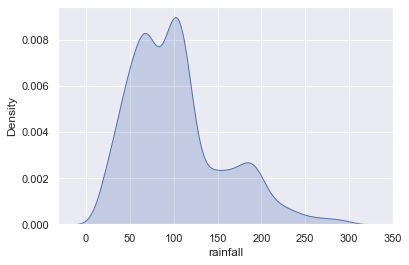

In [22]:
# KDE Plot -

sns.set(style = "darkgrid")
sns.kdeplot(data = data['rainfall'], shade = True)


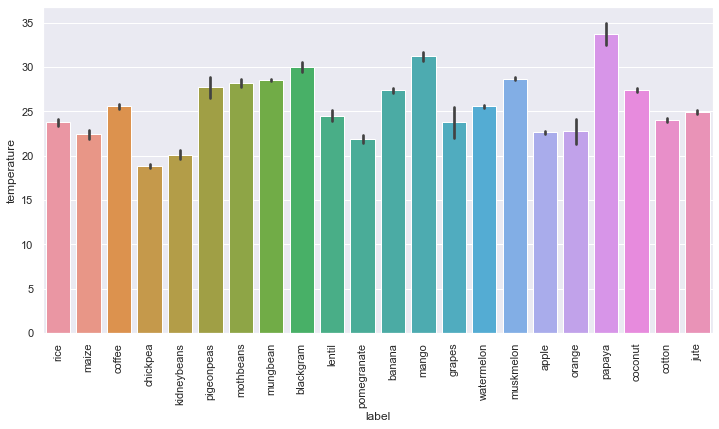

In [23]:
# plotting bar plot using label and temperature --

plt.figure(figsize = (12,6))
sns.barplot("label", "temperature", data = data)
plt.xticks(rotation = 90)
plt.show()


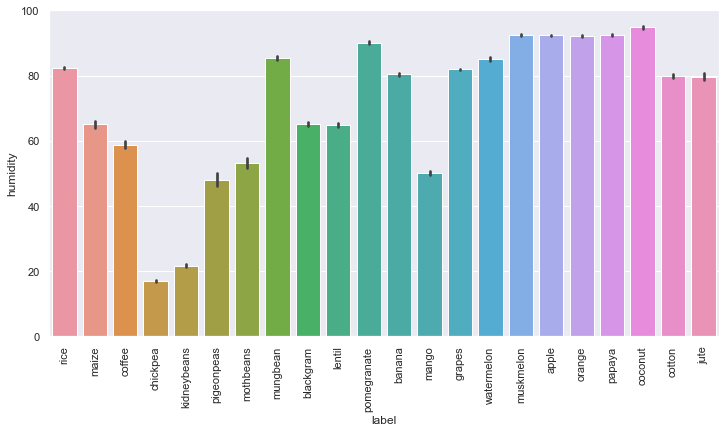

In [24]:
# plotting bar plot using label and humidity --

plt.figure(figsize = (12,6))
sns.barplot("label", "humidity",data = data)
plt.xticks(rotation = 90)
plt.show()


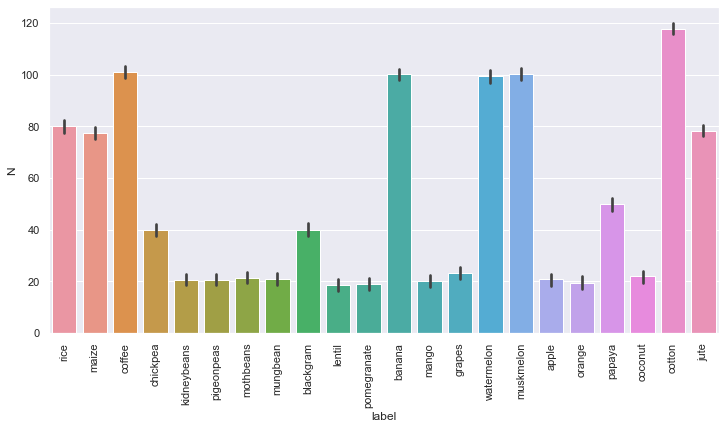

In [25]:
# plotting bar plot using label and nitrogen --

plt.figure(figsize = (12,6))
sns.barplot("label", "N",data = data)
plt.xticks(rotation = 90)
plt.show()


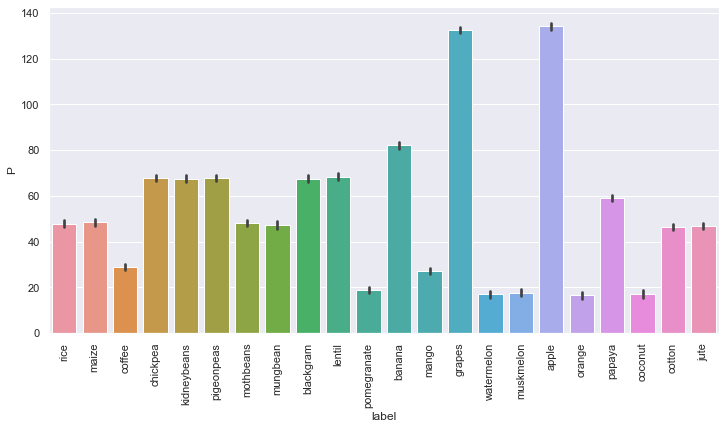

In [26]:
# plotting bar plot using label and Phosphourus --

plt.figure(figsize = (12,6))
sns.barplot("label", "P",data = data)
plt.xticks(rotation = 90)
plt.show()


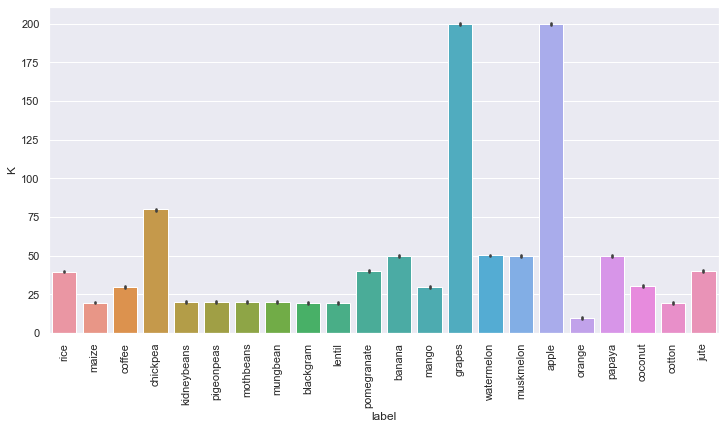

In [27]:
# plotting bar plot using label and Potassium --

plt.figure(figsize = (12,6))
sns.barplot("label", "K",data = data)
plt.xticks(rotation = 90)
plt.show()


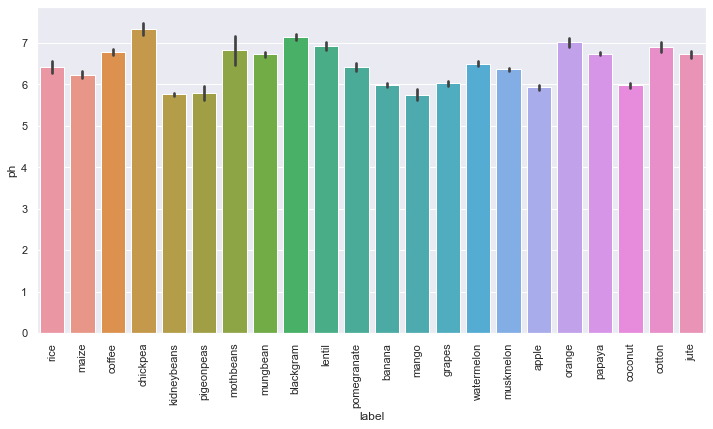

In [28]:
# plotting bar plot using label and pH Value --

plt.figure(figsize = (12,6))
sns.barplot("label", "ph",data = data)
plt.xticks(rotation = 90)
plt.show()


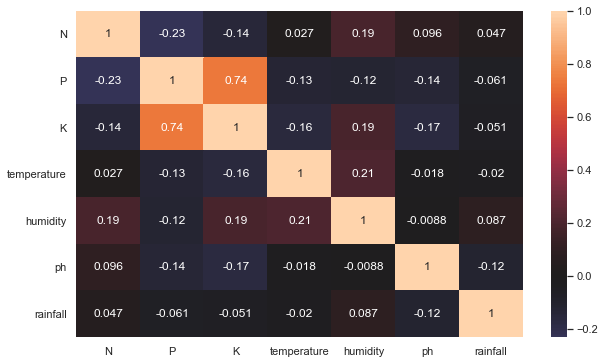

In [29]:
# Heatmap -

plt.figure(figsize=(10,6))
heatmap = sns.heatmap(data.corr(), center = 0, annot = True)


In [30]:
#..

## Final Model

### Spliting the dataset -

In [31]:
### Seprating features and targeting variable --

features = data[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = data['label']


In [32]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features, target, test_size = 0.2, random_state = 42)


### Random Forest 

In [33]:

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)

RF.fit(Xtrain,Ytrain)


RandomForestClassifier(n_estimators=20, random_state=0)

In [34]:
predicted_values = RF.predict(Xtest)

In [35]:

x = metrics.accuracy_score(Ytest, predicted_values)

print("RF's Accuracy is: ", x)


RF's Accuracy is:  0.9931818181818182


### Test the Model

In [36]:
# PLEASE ENTER -- 

# First Place : Nitogen
# Second Place : Phosphorus
# Third Place : Pottasium
# Fourth Place : Temperature
# Fifth Place : Humidity
# Sixth Place : PH Value
# Seventh Place : Railfall


In [37]:
# 1) --

data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)


['coffee']


In [38]:
# 2) --

data = np.array([[83, 45, 60, 28, 90.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)


['papaya']
